<h1> 1. Eksploratorna analiza podataka </h1>

Namjena ove datoteke je da vizualiziramo podatke iz skupu za učenje te da bolje razumijemo podatke s kojima baratamo. U bilježnici se nalazi preliminarno čišćenje podataka koje će biti detaljno napravljeno u bilježnici "data_processing". 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
## DIO POTREBAN ZA BRISANJE UPOZORENJA (kako bismo sačuvali anonimnost)
import warnings
warnings.filterwarnings('ignore')

<h2> Učitavanje skupa podataka i generalni uvid u podatke </h2>

In [ ]:
# učitavanje podataka uz pretvorbu formata datuma 
mydateparser = lambda c: pd.to_datetime(c, format='%d.%m.%Y', errors='coerce')
df = pd.read_csv('./data/raw/training_dataset_enc.csv', 
                 parse_dates=['DATUM_IZVJESTAVANJA', 'PLANIRANI_DATUM_ZATVARANJA', 'DATUM_OTVARANJA', 'DATUM_ZATVARANJA'], 
                 date_parser=mydateparser)

In [3]:
# brisanje nepotrebnih stupaca 
del df['Unnamed: 0']; del df['Unnamed: 0.1']; 

In [ ]:
## ispis u pogodniji format - formati datuma ostaju sačuvani te se brže učitavaju podaci
df.to_hdf('training_dataset.h5', key = 'df')

In [3]:
## ukoliko datoteka sa skupom za učenje u novom formatu postoji u direktoriju, čitamo je ovako:
df = pd.read_hdf('training_dataset.h5', key = 'df')

In [4]:
df.shape

(5193124, 17)

In [5]:
df.head()

,DATUM_IZVJESTAVANJA,KLIJENT_ID,OZNAKA_PARTIJE,DATUM_OTVARANJA,PLANIRANI_DATUM_ZATVARANJA,DATUM_ZATVARANJA,UGOVORENI_IZNOS,STANJE_NA_KRAJU_PRETH_KVARTALA,STANJE_NA_KRAJU_KVARTALA,VALUTA,VRSTA_KLIJENTA,PROIZVOD,VRSTA_PROIZVODA,VISINA_KAMATE,TIP_KAMATE,STAROST,PRIJEVREMENI_RASKID
0,2013-12-31,412140,7146814,2012-08-27,2018-04-30,NaT,629155.97,639373.81,641562.01,2,1420,TM0109,L,1.50,A,22,N
1,2013-12-31,772139,5521579,2010-06-11,2017-06-30,NaT,46000.00,28481.94,26887.19,1,1410,FL0801,A,9.70,B,38,N
2,2013-12-31,481985,7443823,2013-01-23,2018-02-28,NaT,44679.50,44908.40,45062.09,2,1550,FD0100,L,3.10,A,37,N
3,2013-12-31,139014,6511639,2011-09-16,2016-09-30,NaT,29959.15,19691.64,18285.89,2,1410,FL0801,A,7.95,B,49,N
4,2013-12-31,952566,6143123,2011-05-23,2014-05-31,NaT,100000.00,24797.93,15685.33,1,1410,FL0801,A,9.70,B,35,N


In [6]:
df.describe()

,KLIJENT_ID,OZNAKA_PARTIJE,UGOVORENI_IZNOS,STANJE_NA_KRAJU_PRETH_KVARTALA,STANJE_NA_KRAJU_KVARTALA,VALUTA,VRSTA_KLIJENTA,VISINA_KAMATE,STAROST
count,5.193124e+06,5.193124e+06,5.193124e+06,4.772056e+06,5.193124e+06,5.193124e+06,5.193124e+06,5.141422e+06,5.193124e+06
mean,7.207398e+05,7.152089e+06,2.554007e+05,1.309054e+05,1.181028e+05,1.682643e+00,1.426380e+03,5.562767e+00,4.141305e+01
std,1.160615e+07,8.765659e+06,3.784332e+06,1.950900e+06,1.829336e+06,8.221024e-01,6.029030e+01,3.760118e+00,2.045255e+02
min,1.002000e+03,1.630070e+05,0.000000e+00,-5.981000e+01,-5.981000e+01,1.000000e+00,1.110000e+03,-4.000000e-03,-7.994000e+03
25%,3.708580e+05,4.275223e+06,2.956673e+04,6.897520e+03,4.032975e+02,1.000000e+00,1.410000e+03,2.350000e+00,3.500000e+01
50%,6.930290e+05,6.603912e+06,6.422751e+04,3.339354e+04,2.673879e+04,2.000000e+00,1.410000e+03,6.480000e+00,4.600000e+01
75%,1.033071e+06,9.142953e+06,1.150000e+05,8.280279e+04,7.627030e+04,2.000000e+00,1.410000e+03,8.740000e+00,5.700000e+01
max,9.991411e+09,1.136257e+08,6.055048e+08,6.105662e+08,6.105662e+08,5.000000e+00,1.610000e+03,8.080000e+01,9.080000e+02


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5193124 entries, 0 to 5193123
Data columns (total 17 columns):
DATUM_IZVJESTAVANJA               datetime64[ns]
KLIJENT_ID                        int64
OZNAKA_PARTIJE                    int64
DATUM_OTVARANJA                   datetime64[ns]
PLANIRANI_DATUM_ZATVARANJA        datetime64[ns]
DATUM_ZATVARANJA                  datetime64[ns]
UGOVORENI_IZNOS                   float64
STANJE_NA_KRAJU_PRETH_KVARTALA    float64
STANJE_NA_KRAJU_KVARTALA          float64
VALUTA                            int64
VRSTA_KLIJENTA                    int64
PROIZVOD                          object
VRSTA_PROIZVODA                   object
VISINA_KAMATE                     float64
TIP_KAMATE                        object
STAROST                           int64
PRIJEVREMENI_RASKID               object
dtypes: datetime64[ns](4), float64(4), int64(5), object(4)
memory usage: 713.2+ MB


<h2> Data preprocessing </h2>

Ciljna značajka je varijabla 'PRIJEVREMENI_RASKID'. Problem na kojem radimo je (binarni) klasifikacijski problem; ciljna značajka može poprimiti vrijednost 'Y' ili 'N'.   

Primjećujemo da u stupcu 'STAROST' postoje netipične vrijednosti kao što su negativne vrijednosti i vrijednosti veće od 900. Rečeno nam je da to znači da podatak nije dostupan. Na prvu pretpostavljamo da se radi o pravnoj osobi pa ćemo postaviti te vrijednosti na -1 i kasnije promijeniti kada očistimo podatke te dobijemo bolji uvid. Npr. mogli bismo te netipične vrijednosti postaviti na prosjek starosti ovisno u vrsti proizvoda i klijenta.

In [8]:
df['STAROST'].values[df['STAROST'].values >= 900] = -1
df['STAROST'].values[df['STAROST'].values < 0] = -1

In [9]:
# istražujemo kategoričke varijable; koje vrijednosti mogu poprimiti 
columns = ['VALUTA', 'VRSTA_KLIJENTA', 'PROIZVOD', 'VRSTA_PROIZVODA','TIP_KAMATE', 'PRIJEVREMENI_RASKID'];
for column_name in columns:
    print(column_name,': ', sorted(df[column_name].unique()))

VALUTA :  [1, 2, 3, 4, 5]
VRSTA_KLIJENTA :  [1110, 1120, 1210, 1310, 1320, 1330, 1350, 1410, 1420, 1430, 1510, 1550, 1610]
PROIZVOD :  ['FD0100', 'FD0200', 'FE0100', 'FE0200', 'FI0500', 'FL0201', 'FL0202', 'FL0600', 'FL0801', 'FL0802', 'FL0803', 'FL0804', 'FL0900', 'FL0901', 'FL1100', 'FL1200', 'FL1201', 'FL1202', 'FL1301', 'FL1304', 'FL1306', 'FL1309', 'FL1310', 'FL1400', 'FL1500', 'FL1600', 'FP0100', 'FS0200', 'TM0102', 'TM0104', 'TM0109', 'TM0500']
VRSTA_PROIZVODA :  ['A', 'L']
TIP_KAMATE :  ['A', 'B', 'C', 'D']
PRIJEVREMENI_RASKID :  ['N', 'Y']


Naknadno je objavljena napomena o vrijednostima ciljne značajke. U evaluacijskom i validacijskom skupu smatrat će se da je ugovor prijevremeno raskinut ukoliko je zatvoren najkasnije 10 dana prije planiranog datuma zatvaranja.

In [10]:
df['PRIJEVREMENI_RASKID'] = np.where(df['DATUM_ZATVARANJA']>=(df['PLANIRANI_DATUM_ZATVARANJA']- np.timedelta64(10, 'D')), 
                                     'N', df['PRIJEVREMENI_RASKID'])

<h3> (Ne)Balansiranost skupa podataka </h3>

Podaci sadrže izvještaje o ugovorima s bankom. Dakle, za svakog klijenta i njegov ugovor postoji varijabilni broj redaka u tablici. Također, svako produljenje ugovora ima novi datum otvaranja pa i to moramo uzeti u obzir. Kako bismo dobili uvid u distribuciju prijevremenih raskida, potrebno je "izbaciti" duplikate.

In [11]:
df.sort_values(['KLIJENT_ID', 'OZNAKA_PARTIJE', 'DATUM_OTVARANJA', 'DATUM_IZVJESTAVANJA'], inplace = True)

duplicates = df.copy()
duplicates.drop_duplicates(subset = ['KLIJENT_ID', 'OZNAKA_PARTIJE', 'DATUM_OTVARANJA'], keep = 'last', inplace = True)

distribucija = duplicates.groupby(['PRIJEVREMENI_RASKID']).size() / duplicates.shape[0]
print('Ako se svako produljenje ugovora smatra zasebno:')
print('Postotak prijevremeno raskinutih ugovora: ', '{:02.2f}'.format(distribucija[1]*100), '%')
print('Postotak ostalih ugovora: ', '{:02.2f}'.format(distribucija[0]*100), '%')
print('Ukupan broj ugovora: ', duplicates.shape[0])

duplicates2 = df.copy()
duplicates2.drop_duplicates(subset = ['KLIJENT_ID', 'OZNAKA_PARTIJE'], inplace = True, keep = 'last')

distribucija = duplicates2.groupby(['PRIJEVREMENI_RASKID']).size() / duplicates2.shape[0]
print('\nAko ugovor sa svim pripadnim produljenjima smatramo kao cjelinu:')
print('Postotak prijevremeno raskinutih ugovora: ', '{:02.2f}'.format(distribucija[1]*100), '%')
print('Postotak ostalih ugovora: ', '{:02.2f}'.format(distribucija[0]*100), '%')
print('Ukupan broj ugovora: ', duplicates2.shape[0])

Ako se svako produljenje ugovora smatra zasebno:
Postotak prijevremeno raskinutih ugovora:  12.43 %
Postotak ostalih ugovora:  87.57 %
Ukupan broj ugovora:  950239

Ako ugovor sa svim pripadnim produljenjima smatramo kao cjelinu:
Postotak prijevremeno raskinutih ugovora:  20.22 %
Postotak ostalih ugovora:  79.78 %
Ukupan broj ugovora:  579636


Zaključujemo da je dataset nebalansiran pa moramo to uzeti u obzir pri odabiru ML modela i metoda pripreme podataka.

<h3>Missing values </h3>

Mnoge vrijednosti u tablici nedostaju pa će ih biti potrebno na neki način "popuniti". Promatranjem tablice zaključujemo da se neke varijable poput 'PLANIRANI_DATUM_ZATVARANJA' i 'DATUM_ZATVARANJA' ne pojavljuju nužno u prvom kvartalnom izvještaju ugovora pa ih je potrebno "povući" iz sljedećih izvještaja. 

Vrijednosti varijable 'STANJE_NA_KRAJU_PRETH_KVARTALA' možemo postaviti na ugovoreni iznos.

Varijablu 'VISINA_KAMATE' ćemo popuniti ovisno o vrsti proizvoda i vrsti klijenta, a STAROST ovisno o vrsti klijenta.

Uvidom u podatke je utvrđeno da se među njima nalaze i krediti koji još nisu zatvoreni pa je logično da za njih nemamo podatak o datumu zatvaranja.

In [12]:
missing_values = df.isnull().sum()
print(missing_values)

DATUM_IZVJESTAVANJA                     0
KLIJENT_ID                              0
OZNAKA_PARTIJE                          0
DATUM_OTVARANJA                         0
PLANIRANI_DATUM_ZATVARANJA         421129
DATUM_ZATVARANJA                  3978638
UGOVORENI_IZNOS                         0
STANJE_NA_KRAJU_PRETH_KVARTALA     421068
STANJE_NA_KRAJU_KVARTALA                0
VALUTA                                  0
VRSTA_KLIJENTA                          0
PROIZVOD                                0
VRSTA_PROIZVODA                         0
VISINA_KAMATE                       51702
TIP_KAMATE                              0
STAROST                                 0
PRIJEVREMENI_RASKID                     0
dtype: int64


Popunjavanje nedostajućih vrijednosti tamo gdje treba ćemo učiniti nakon što transformiramo skup podataka. Naime, da bismo primijenile željene ML algoritme, potrebno je izvući informacije o pojedinom ugovoru iz pripadajućih izvještaja tako da svedemo podatke tog ugovora na jedan redak dataframe-a. 

Ugovor je određen značajkama 'KLIJENT_ID', 'OZNAKA_PARTIJE' i 'DATUM_OTVARANJA'. Transformirat ćemo podatke tako da definiramo nove mjere (značajke) koje će odražavati trend ugovora i bitno utjecati na ciljnu značajku.

Također, nakon što transformiramo dataset, izbacit ćemo nerelevantne značajke za treniranje modela kao što je 'OZNAKA_PARTIJE'. i sl. 

<h2> Vizualizacija značajki </h2>

Kako bismo mogle vizualizirati neke značajke, napravit ćemo kopiju podataka i tamo izbaciti značajke vezane uz izvještaje te sažeti dataset.

In [13]:
df_copy = df.copy()
df_copy.sample(n=10)

,DATUM_IZVJESTAVANJA,KLIJENT_ID,OZNAKA_PARTIJE,DATUM_OTVARANJA,PLANIRANI_DATUM_ZATVARANJA,DATUM_ZATVARANJA,UGOVORENI_IZNOS,STANJE_NA_KRAJU_PRETH_KVARTALA,STANJE_NA_KRAJU_KVARTALA,VALUTA,VRSTA_KLIJENTA,PROIZVOD,VRSTA_PROIZVODA,VISINA_KAMATE,TIP_KAMATE,STAROST,PRIJEVREMENI_RASKID
2427362,2018-09-30,233737,1407556,2015-09-30,2036-12-31,NaT,363910.34,294373.93,293767.05,2,1410,FL1301,A,5.25,A,39,N
979785,2017-06-30,671533,9967124,2017-06-16,2017-06-16,NaT,32219.08,32190.63,32219.08,1,1410,TM0109,L,0.25,A,40,N
2190986,2015-06-30,554166,5740872,2010-11-29,2017-11-30,NaT,59291.38,27763.49,25207.59,2,1410,FL0801,A,8.55,B,44,N
627354,2012-03-31,115279,6552561,2011-10-20,2021-10-31,NaT,68131.07,67996.53,66634.77,2,1410,FL0801,A,7.95,C,35,N
4819167,2017-09-30,1211759,6735743,2017-02-25,2018-02-26,NaT,41126.90,41126.90,41126.90,1,1410,TM0109,L,1.45,A,34,N
2498645,2013-09-30,294267,7488340,2013-02-08,2014-02-09,NaT,450000.00,450000.00,450000.00,1,1550,TM0109,L,4.20,A,54,N
1956559,2012-03-31,735560,6551120,2011-10-20,2012-01-21,2012-01-21,70000.00,70000.00,0.00,1,1410,TM0109,L,3.30,A,37,N
3627303,2015-12-31,48446,584460,2014-01-12,2017-01-13,NaT,139349.19,144732.06,144788.36,2,1410,TM0109,L,2.85,A,47,N
4664258,2011-03-31,363141,1436201,2003-05-16,2018-05-31,NaT,225376.32,136979.38,133346.42,2,1410,FL1301,A,6.75,C,54,N
4502931,2016-12-31,211372,12335232,2016-11-08,NaT,NaT,15015.47,NaN,14431.58,1,1410,FL0801,A,7.14,B,63,N


In [14]:
df_copy.shape

(5193124, 17)

In [15]:
df_copy.drop_duplicates(subset = ['KLIJENT_ID', 'OZNAKA_PARTIJE', 'DATUM_OTVARANJA'], keep = 'last', inplace = True)

In [16]:
df_copy.shape

(950239, 17)

In [16]:
del_col_list = ['DATUM_IZVJESTAVANJA','PLANIRANI_DATUM_ZATVARANJA', 'DATUM_ZATVARANJA',
       'STANJE_NA_KRAJU_PRETH_KVARTALA', 'STANJE_NA_KRAJU_KVARTALA']
df_copy.drop(del_col_list, axis = 1, inplace = True)

In [17]:
prijevremeni_raskidi = df_copy.loc[ df_copy['PRIJEVREMENI_RASKID'] == 'Y', : ]
neprijevremeni_raskidi = df_copy.loc[ df_copy['PRIJEVREMENI_RASKID'] == 'N', : ]

In [18]:
df.columns

Index(['DATUM_IZVJESTAVANJA', 'KLIJENT_ID', 'OZNAKA_PARTIJE',
       'DATUM_OTVARANJA', 'PLANIRANI_DATUM_ZATVARANJA', 'DATUM_ZATVARANJA',
       'UGOVORENI_IZNOS', 'STANJE_NA_KRAJU_PRETH_KVARTALA',
       'STANJE_NA_KRAJU_KVARTALA', 'VALUTA', 'VRSTA_KLIJENTA', 'PROIZVOD',
       'VRSTA_PROIZVODA', 'VISINA_KAMATE', 'TIP_KAMATE', 'STAROST',
       'PRIJEVREMENI_RASKID'],
      dtype='object')

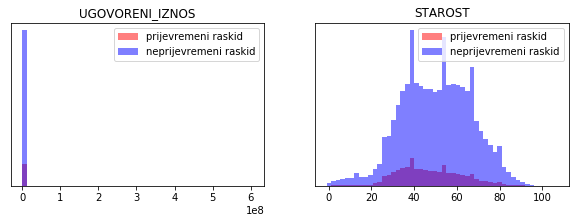

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
ax = axes.ravel() # axes are 2-dimensional so we unfold them

i = 3 
_, bins = np.histogram(df_copy.iloc[:,i], bins=50)
ax[0].hist(prijevremeni_raskidi.iloc[:,i], bins=bins, color='r', alpha=.5, label='prijevremeni raskid')
ax[0].hist(neprijevremeni_raskidi.iloc[:,i], bins=bins, color='b', alpha=.5, label='neprijevremeni raskid')
ax[0].set_title(df_copy.columns.values[i])
ax[0].set_yticks(()) # remove ticks on y-axis
ax[0].legend(loc='upper right')

i = 10
_, bins = np.histogram(df_copy.iloc[:,i], bins=50)
ax[1].hist(prijevremeni_raskidi.iloc[:,i], bins=bins, color='r', alpha=.5, label='prijevremeni raskid')
ax[1].hist(neprijevremeni_raskidi.iloc[:,i], bins=bins, color='b', alpha=.5, label='neprijevremeni raskid')
ax[1].set_title(df_copy.columns.values[i])
ax[1].set_yticks(()) # remove ticks on y-axis
ax[1].legend(loc='upper right')



Još i u početku analize se može primijetiti da postoje ekstremne vrijednosti u stupcu 'UGOVORENI_IZNOS', što dolazi do izražaja u histogramu.

Iz drugog histograma vidimo da značajka 'STAROST' ne razdvaja dobro klase sama po sebi što je i očekivano.




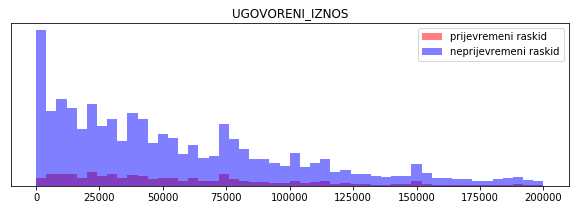

In [20]:
# izdvajamo podatke gdje ugovoreni iznos nije ekstreman radi bolje vizualizacije
subdf = df_copy[df_copy['UGOVORENI_IZNOS'] < 2e5]
prijevremeni_raskidi = subdf.loc[ subdf['PRIJEVREMENI_RASKID'] == 'Y', : ]
neprijevremeni_raskidi = subdf.loc[ subdf['PRIJEVREMENI_RASKID'] == 'N', : ]

fig, ax = plt.subplots(1, 1, figsize=(10, 3))

i = 3 
_, bins = np.histogram(subdf.iloc[:,i], bins=50)
ax.hist(prijevremeni_raskidi.iloc[:,i], bins=bins, color='r', alpha=.5, label='prijevremeni raskid')
ax.hist(neprijevremeni_raskidi.iloc[:,i], bins=bins, color='b', alpha=.5, label='neprijevremeni raskid')
ax.set_title(subdf.columns.values[i])
ax.set_yticks(()) # remove ticks on y-axis
ax.legend(loc='upper right')

Na gornjem histogramu bolje uočavamo odnos klasa ovisno o ugovorenom iznosu. Također zaključujemo da ta značajka sama po sebi ne razdvaja dobro klase, ali to samo potvrđuje naše mišljenje.

In [21]:
import seaborn as sns

# pomocna funkcija za opis kategorickih varijabli, 
# preuzeta sa 
# https://towardsdatascience.com/a-starter-pack-to-exploratory-data-analysis-with-python-pandas-seaborn-and-scikit-learn-a77889485baf

def categorical_summarized(dataframe, x=None, y=None, hue=None, palette='Set1', verbose=True):
    '''
    Helper function that gives a quick summary of a given column of categorical data
    Arguments
    =========
    dataframe: pandas dataframe
    x: str. horizontal axis to plot the labels of categorical data, y would be the count
    y: str. vertical axis to plot the labels of categorical data, x would be the count
    hue: str. if you want to compare it another variable (usually the target variable)
    palette: array-like. Colour of the plot
    Returns
    =======
    Quick Stats of the data and also the count plot
    '''
    if x == None:
        column_interested = y
    else:
        column_interested = x
    series = dataframe[column_interested]
    print(series.describe())
    print('mode: ', series.mode())
    if verbose:
        print('='*80)
        print(series.value_counts())

    sns.countplot(x=x, y=y, hue=hue, data=dataframe, palette=palette)
    plt.show()

count     950239
unique         2
top            N
freq      832139
Name: PRIJEVREMENI_RASKID, dtype: object
mode:  0    N
dtype: object
N    832139
Y    118100
Name: PRIJEVREMENI_RASKID, dtype: int64


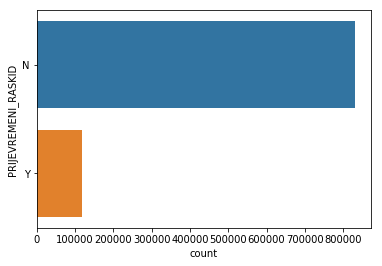

In [22]:
c_palette = ['tab:blue', 'tab:orange']
# vizualizacija balansiranosti dataset-a
categorical_summarized(df_copy, y = 'PRIJEVREMENI_RASKID', palette=c_palette)

count    950239.000000
mean          1.744054
std           0.803767
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           5.000000
Name: VALUTA, dtype: float64
mode:  0    2
dtype: int64
2    464745
1    393151
3     43672
4     39744
5      8927
Name: VALUTA, dtype: int64


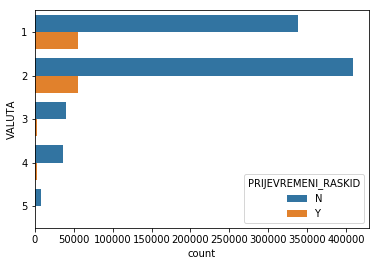

In [23]:
categorical_summarized(df_copy, y = 'VALUTA', hue = 'PRIJEVREMENI_RASKID', palette=c_palette)

count    950239.000000
mean       1429.972354
std          64.790949
min        1110.000000
25%        1410.000000
50%        1410.000000
75%        1410.000000
max        1610.000000
Name: VRSTA_KLIJENTA, dtype: float64
mode:  0    1410
dtype: int64
1410    766244
1550    131484
1610     18232
1430      9382
1420      6191
1110      6108
1120      5206
1510      3607
1320      2898
1350       443
1330       237
1210       167
1310        40
Name: VRSTA_KLIJENTA, dtype: int64


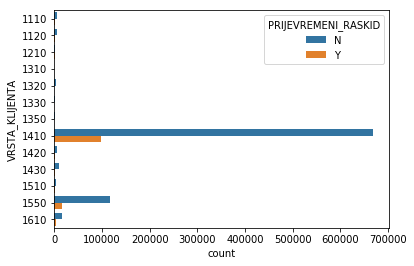

In [24]:
categorical_summarized(df_copy, y = 'VRSTA_KLIJENTA', hue = 'PRIJEVREMENI_RASKID', palette=c_palette)

Primjećujemo da ima daleko više klijenata vrste '1410'  od ostalih pa bismo mogli zaključiti da se radi o fizičkim osobama.

count     950239
unique         2
top            L
freq      629313
Name: VRSTA_PROIZVODA, dtype: object
mode:  0    L
dtype: object
L    629313
A    320926
Name: VRSTA_PROIZVODA, dtype: int64


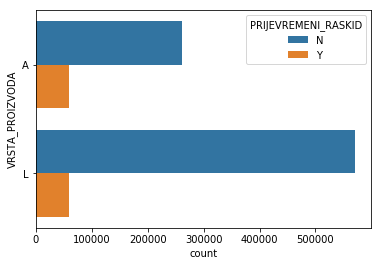

In [25]:
categorical_summarized(df_copy, y = 'VRSTA_PROIZVODA', hue = 'PRIJEVREMENI_RASKID', palette=c_palette)

count     950239
unique         4
top            A
freq      672051
Name: TIP_KAMATE, dtype: object
mode:  0    A
dtype: object
A    672051
C    157232
B    120947
D         9
Name: TIP_KAMATE, dtype: int64


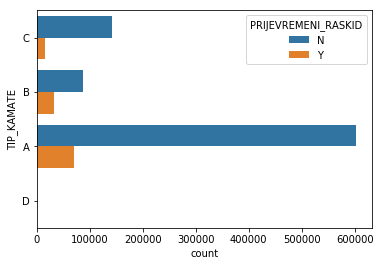

In [26]:
categorical_summarized(df_copy, y = 'TIP_KAMATE', hue = 'PRIJEVREMENI_RASKID', palette=c_palette)

<h2> Sljedeći koraci </h2>

 - nastavak čišćenja dataset-a: outlieri, nelogičnosti, nekonzistentni podaci...
 - definicija novih značajki koje će odraziti informacije iz izvještaja o ugovorima (za pojedini ugovor) 
 - enkodiranje kategoričkih značajki 
 - odabir značajki
 - treniranje raznih ML modela ( + odabir hiperparametara po potrebi), evaluacija, validacija 